<a href="https://colab.research.google.com/github/nishitpatell/UCDP-WorldBankDataset/blob/main/PreProcessingDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/nishitpatell/UCDP-WorldBankDataset/refs/heads/main/organizedviolencecy_v25_1.csv
!wget https://raw.githubusercontent.com/nishitpatell/UCDP-WorldBankDataset/refs/heads/main/worldDevelopmentIndicators1.csv

--2025-09-19 07:27:29--  https://raw.githubusercontent.com/nishitpatell/UCDP-WorldBankDataset/refs/heads/main/organizedviolencecy_v25_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2224081 (2.1M) [text/plain]
Saving to: ‘organizedviolencecy_v25_1.csv’

organizedviolencecy 100%[===================>]   2.12M  --.-KB/s    in 0.07s   

2025-09-19 07:27:30 (30.3 MB/s) - ‘organizedviolencecy_v25_1.csv’ saved [2224081/2224081]

--2025-09-19 07:27:30--  https://raw.githubusercontent.com/nishitpatell/UCDP-WorldBankDataset/refs/heads/main/worldDevelopmentIndicators1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

In [ ]:
import pandas as pd
file_path = '/content/worldDevelopmentIndicators1.csv'
wb = pd.read_csv(file_path)
wb.head()

,Country Name,Country Code,Series Name,Series Code,2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-2.14821228495553,7.38337728197978,1.13248505528998,11.6923032922081,1.6772791560615,17.0438963216074,...,-0.939984755736006,-1.66505744749013,-0.300121027406746,-0.195569548342789,-1.71374269254262,0.856294729087764,-5.38251464221077,-22.5844818732987,-7.57666891152213,0.540655554216826
1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,12.6862687216715,6.78459655001655,8.68057078513406,26.4186641547444,-6.81116108898996,...,4.67399603536345,-0.661709164713742,4.38389195513915,4.97595150553833,0.626149149168847,2.30237251516834,5.60188791482224,5.13320340824963,13.7121023720065,-4.64470870797775
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.899,7.885,7.914,7.817,7.878,7.754,...,7.915,9.052,10.133,11.184,11.196,11.185,11.71,11.994,14.1,13.991
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,23560654,24404567,25424094,25909852,26482622,27466101,...,32792523,33831764,34700612,35688935,36743039,37856121,39068979,40000412,40578842,41454761
4,Afghanistan,AFG,"Population, female",SP.POP.TOTL.FE.IN,11709120,12119909,12618615,12853489,13131734,13612943,...,16221843,16732244,17159297,17649936,18178417,18736474,19343529,19813956,20103167,20530683


In [ ]:
#melting to long format --- from columns = year to column = year
wb_long = wb.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    var_name="Year",
    value_name="Value"
)

In [ ]:
# Extract the year number from strings like "2004 [YR2004]"
wb_long["Year"] = wb_long["Year"].str.extract(r"(\d{4})").astype(int)

In [ ]:
wb_long.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2004,-2.14821228495553
1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2004,..
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2004,7.899
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,2004,23560654
4,Afghanistan,AFG,"Population, female",SP.POP.TOTL.FE.IN,2004,11709120


In [ ]:
# Replace ".." with NaN and converting everything else to float
wb_long["Value"] = pd.to_numeric(wb_long["Value"].replace("..", pd.NA), errors="coerce")

In [ ]:
wb_long.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2004,-2.148212e+00
1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2004,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2004,7.899000e+00
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,2004,2.356065e+07
4,Afghanistan,AFG,"Population, female",SP.POP.TOTL.FE.IN,2004,1.170912e+07


In [ ]:
# Pivot (indicators → columns)
wb_pivot = wb_long.pivot_table(
    index=["Country Name", "Country Code", "Year"],   # each row = country + year
    columns="Series Name",                            # each indicator becomes a column
    values="Value",
    aggfunc="first"                                   # if duplicates exist, take the first
).reset_index()

In [ ]:
wb_pivot.head()

Series Name,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,NaN,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [ ]:
# Renaming cols
rename_dict = {
    "GDP per capita growth (annual %)": "gdp_pc_growth_pct",
    "Inflation, consumer prices (annual %)": "inflation_cpi_pct",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": "unemployment_pct",
    "Population, total": "population_total",
    "Population, female": "population_female",
    "Population, male": "population_male",
    "Life expectancy at birth, total (years)": "life_expectancy_years",
    "Political Stability and Absence of Violence/Terrorism: Estimate": "political_stability_est",
    "Control of Corruption: Estimate": "corruption_control_est",
    "Refugees under the mandate of the UNHCR by country or territory of origin": "refugees_origin",
    "Government Effectiveness: Estimate": "gov_effectiveness_est"
}
wb_pivot = wb_pivot.rename(columns=rename_dict)
wb_pivot.head()

Series Name,Country Name,Country Code,Year,corruption_control_est,gdp_pc_growth_pct,gov_effectiveness_est,inflation_cpi_pct,life_expectancy_years,political_stability_est,population_female,population_male,population_total,refugees_origin,unemployment_pct
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,NaN,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [ ]:
wb_pivot = wb_pivot.sort_values(by=["Country Name", "Year"]).reset_index(drop=True)

In [ ]:
# saving the clened dataset
wb_pivot.to_csv('worldBankIndicatorsCleaned.csv', index=False)

In [ ]:
print("Rows:", wb_pivot.shape[0])
print("Columns:", wb_pivot.shape[1])
print("Years:", wb_pivot['Year'].min(), "to", wb_pivot['Year'].max())
print(wb_pivot.head())

Rows: 5300
Columns: 14
Years: 2004 to 2023
Series Name Country Name Country Code  Year  corruption_control_est  \
0            Afghanistan          AFG  2004               -1.350647   
1            Afghanistan          AFG  2005               -1.447252   
2            Afghanistan          AFG  2006               -1.446292   
3            Afghanistan          AFG  2007               -1.613251   
4            Afghanistan          AFG  2008               -1.672096   

Series Name  gdp_pc_growth_pct  gov_effectiveness_est  inflation_cpi_pct  \
0                    -2.148212              -0.945146                NaN   
1                     7.383377              -1.228816          12.686269   
2                     1.132485              -1.473652           6.784597   
3                    11.692303              -1.440111           8.680571   
4                     1.677279              -1.527795          26.418664   

Series Name  life_expectancy_years  political_stability_est  \
0         

In [ ]:
wb_pivot.head()

Series Name,Country Name,Country Code,Year,corruption_control_est,gdp_pc_growth_pct,gov_effectiveness_est,inflation_cpi_pct,life_expectancy_years,political_stability_est,population_female,population_male,population_total,refugees_origin,unemployment_pct
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,NaN,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [ ]:
#Forward fill and backward fill
df_filled = (
    wb_pivot
    .sort_values(["Country Name", "Year"])
    .groupby('Country Name', group_keys=False)
    .apply(lambda x: x.ffill().bfill())
)
df_filled.head()

/tmp/ipython-input-1852303418.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.ffill().bfill())


Series Name,Country Name,Country Code,Year,corruption_control_est,gdp_pc_growth_pct,gov_effectiveness_est,inflation_cpi_pct,life_expectancy_years,political_stability_est,population_female,population_male,population_total,refugees_origin,unemployment_pct
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,12.686269,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


## Preprocessing the ucdp dataset

In [ ]:
df_ucdp = pd.read_csv("/content/organizedviolencecy_v25_1.csv")
print(df_ucdp.shape)
df_ucdp.head()

(6936, 74)


,country_id_cy,country_cy,year_cy,region_cy,main_govt_name_cy,sb_exist_cy,sb_dyad_count_cy,sb_dyad_ids_cy,sb_dyad_names_cy,sb_deaths_parties_cy,...,os_total_deaths_best_cy,os_total_deaths_high_cy,os_total_deaths_low_cy,cumulative_total_deaths_parties_in_orgvio_cy,cumulative_total_deaths_civilians_in_orgvio_cy,cumulative_total_deaths_unknown_in_orgvio_cy,cumulative_total_deaths_in_orgvio_best_cy,cumulative_total_deaths_in_orgvio_high_cy,cumulative_total_deaths_in_orgvio_low_cy,version
0,700,Afghanistan,1989,Asia,Government of Afghanistan,1,5,724; 726; 727; 729; 732,Government of Afghanistan - Hizb-i Islami-yi A...,1019,...,0,0,0,1065,303,4043,5411,17642,2141,25.1
1,700,Afghanistan,1990,Asia,Government of Afghanistan,1,5,724; 726; 727; 732; 733,Government of Afghanistan - Hizb-i Islami-yi A...,704,...,0,0,0,724,101,689,1514,2311,1359,25.1
2,700,Afghanistan,1991,Asia,Government of Afghanistan,1,4,724; 726; 727; 732,Government of Afghanistan - Hizb-i Islami-yi A...,2274,...,0,0,0,2274,49,1230,3553,4053,3407,25.1
3,700,Afghanistan,1992,Asia,Government of Afghanistan,1,4,724; 726; 727; 732,Government of Afghanistan - Hizb-i Islami-yi A...,187,...,8,304,8,187,1695,2503,4385,5865,4368,25.1
4,700,Afghanistan,1993,Asia,Government of Afghanistan,1,4,726; 732; 734; 842,Government of Afghanistan - Hizb-i Islami-yi A...,554,...,26,240,26,556,637,2912,4105,8433,4097,25.1


In [ ]:
df_ucdp = df_ucdp[(df_ucdp["year_cy"] >= 2004) & (df_ucdp["year_cy"] <= 2023)]
print(df_ucdp.shape)
df_ucdp.head()

(3907, 74)


,country_id_cy,country_cy,year_cy,region_cy,main_govt_name_cy,sb_exist_cy,sb_dyad_count_cy,sb_dyad_ids_cy,sb_dyad_names_cy,sb_deaths_parties_cy,...,os_total_deaths_best_cy,os_total_deaths_high_cy,os_total_deaths_low_cy,cumulative_total_deaths_parties_in_orgvio_cy,cumulative_total_deaths_civilians_in_orgvio_cy,cumulative_total_deaths_unknown_in_orgvio_cy,cumulative_total_deaths_in_orgvio_best_cy,cumulative_total_deaths_in_orgvio_high_cy,cumulative_total_deaths_in_orgvio_low_cy,version
15,700,Afghanistan,2004,Asia,Government of Afghanistan,1,2,735; 878,Government of Afghanistan - Taleban; Governmen...,589,...,53,72,51,612,77,128,817,1439,773,25.1
16,700,Afghanistan,2005,Asia,Government of Afghanistan,1,2,735; 878,Government of Afghanistan - Taleban; Governmen...,1471,...,116,150,116,1471,200,40,1711,2109,1528,25.1
17,700,Afghanistan,2006,Asia,Government of Afghanistan,1,3,726; 735; 878,Government of Afghanistan - Hizb-i Islami-yi A...,4242,...,196,253,194,4243,477,262,4982,5853,4911,25.1
18,700,Afghanistan,2007,Asia,Government of Afghanistan,1,3,12291; 735; 878,Government of Afghanistan - Government of Paki...,6193,...,113,142,113,6193,674,170,7037,8601,6480,25.1
19,700,Afghanistan,2008,Asia,Government of Afghanistan,1,4,12291; 726; 735; 878,Government of Afghanistan - Government of Paki...,4576,...,108,120,74,4576,763,322,5661,7194,5185,25.1


### os_exist-cy = one sided violence
### ns_exist_cy = non-state violence
### sb_exist_cy = state-based violence

##**1. sb_exist_cy → State-Based Violence**

Violence where the government (state forces) is one of the warring parties.

Example: Civil war between government troops and a rebel group, or international war involving two states.

1 = at least one episode of state-based armed conflict occurred in that country-year.

0 = none recorded.

## **2. ns_exist_cy → Non-State Violence**

Violence between two organized groups, neither of which is the state.

Example: Fighting between two rebel groups, or between ethnic militias, gangs, or armed factions.

1 = at least one non-state conflict event occurred in that country-year.

0 = none recorded.

## 3. os_exist_cy → One-Sided Violence

Violence where one organized actor intentionally attacks civilians (not combatants).

Example: Genocides, massacres, or systematic attacks against unarmed civilians by either the government or a rebel group.

1 = at least one such episode occurred in that country-year.

0 = none recorded.

In [ ]:
# dropping duplicate and unused cols
df_ucdp = df_ucdp[[
    "country_cy", "year_cy",
    "sb_exist_cy", "ns_exist_cy", "os_exist_cy"
]]
print(df_ucdp.shape)
df_ucdp.head()

(3907, 5)


,country_cy,year_cy,sb_exist_cy,ns_exist_cy,os_exist_cy
15,Afghanistan,2004,1,1,1
16,Afghanistan,2005,1,0,1
17,Afghanistan,2006,1,1,1
18,Afghanistan,2007,1,1,1
19,Afghanistan,2008,1,0,1


In [ ]:
# creating a target variable
df_ucdp["organized_violence_occurred"] = (
    (df_ucdp["sb_exist_cy"] == 1) |
    (df_ucdp["ns_exist_cy"] == 1) |
    (df_ucdp["os_exist_cy"] == 1)
).astype(int)

In [ ]:
print(df_ucdp.shape)
df_ucdp.head()

(3907, 6)


,country_cy,year_cy,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
15,Afghanistan,2004,1,1,1,1
16,Afghanistan,2005,1,0,1,1
17,Afghanistan,2006,1,1,1,1
18,Afghanistan,2007,1,1,1,1
19,Afghanistan,2008,1,0,1,1


In [ ]:
df_ucdp.rename(columns={'country_cy': 'Country', 'year_cy': 'Year'}, inplace=True)
df_ucdp.head()

,Country,Year,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
15,Afghanistan,2004,1,1,1,1
16,Afghanistan,2005,1,0,1,1
17,Afghanistan,2006,1,1,1,1
18,Afghanistan,2007,1,1,1,1
19,Afghanistan,2008,1,0,1,1


In [ ]:
df_ucdp[df_ucdp["Country"] == "Mexico"]


,Country,Year,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
3989,Mexico,2004,0,1,1,1
3990,Mexico,2005,0,1,0,1
3991,Mexico,2006,0,1,1,1
3992,Mexico,2007,0,1,1,1
3993,Mexico,2008,0,1,1,1
3994,Mexico,2009,0,1,1,1
3995,Mexico,2010,0,1,1,1
3996,Mexico,2011,0,1,1,1
3997,Mexico,2012,0,1,1,1
3998,Mexico,2013,0,1,1,1


In [ ]:
df_ucdp['organized_violence_occurred'].value_counts()

,count
organized_violence_occurred,
0,2797
1,1110


In [ ]:
df_ucdp['sb_exist_cy'].value_counts()

,count
sb_exist_cy,
0,3096
1,811


In [ ]:
df_ucdp['ns_exist_cy'].value_counts()

,count
ns_exist_cy,
0,3436
1,471


In [ ]:
df_ucdp['os_exist_cy'].value_counts()

,count
os_exist_cy,
0,3078
1,829


In [ ]:
df_ucdp.to_csv('OrganizedViolencecyCleaned.csv', index=False)

# Merging two datasets/dataframes

In [ ]:
print(wb_pivot.columns)
print(df_ucdp.columns)

Index(['Country Name', 'Country Code', 'Year', 'corruption_control_est',
       'gdp_pc_growth_pct', 'gov_effectiveness_est', 'inflation_cpi_pct',
       'life_expectancy_years', 'political_stability_est', 'population_female',
       'population_male', 'population_total', 'refugees_origin',
       'unemployment_pct'],
      dtype='object', name='Series Name')
Index(['Country', 'Year', 'sb_exist_cy', 'ns_exist_cy', 'os_exist_cy',
       'organized_violence_occurred'],
      dtype='object')


In [ ]:
wb_pivot.rename(columns={'Country Name': 'Country'}, inplace=True)
wb_pivot.head()
wb_pivot.columns

Index(['Country', 'Country Code', 'Year', 'corruption_control_est',
       'gdp_pc_growth_pct', 'gov_effectiveness_est', 'inflation_cpi_pct',
       'life_expectancy_years', 'political_stability_est', 'population_female',
       'population_male', 'population_total', 'refugees_origin',
       'unemployment_pct'],
      dtype='object', name='Series Name')

In [ ]:
print("World Bankd Indicators shape: ", wb_pivot.shape)
print("Organized violence shape: ",df_ucdp.shape)

World Bankd Indicators shape:  (5300, 14)
Organized violence shape:  (3907, 6)


In [ ]:
# For World Bank indicators
unique_countries_wdi = wb_pivot["Country"].nunique()
list_countries_wdi = wb_pivot["Country"].unique()

# For UCDP
unique_countries_ucdp = df_ucdp["Country"].nunique()
list_countries_ucdp = df_ucdp["Country"].unique()

print("World Bank unique countries:", unique_countries_wdi)
print("UCDP unique countries:", unique_countries_ucdp)

World Bank unique countries: 265
UCDP unique countries: 196


In [ ]:
# intersection vs. difference in names:
set_wdi = set(wb_pivot["Country"].unique())
set_ucdp = set(df_ucdp["Country"].unique())

common_countries = set_wdi.intersection(set_ucdp)
only_in_wdi = set_wdi - set_ucdp
only_in_ucdp = set_ucdp - set_wdi

print("Countries in both datasets:", len(common_countries))
print("Only in WDI:", len(only_in_wdi))
print("Only in UCDP:", len(only_in_ucdp))

Countries in both datasets: 158
Only in WDI: 107
Only in UCDP: 38


In [ ]:
df_merged = pd.merge(
    wb_pivot,
    df_ucdp,
    how="inner",
    on=["Country", "Year"]
)

In [ ]:
print("Merged shape:", df_merged.shape)
print(df_merged[["Country", "Year"]].duplicated().sum(), "duplicate (Country, Year) pairs")
print("Nulls per column:\n", df_merged.isna().sum().sort_values(ascending=False))

Merged shape: (3147, 18)
0 duplicate (Country, Year) pairs
Nulls per column:
 inflation_cpi_pct              267
unemployment_pct               259
refugees_origin                162
gdp_pc_growth_pct               49
gov_effectiveness_est           30
corruption_control_est          30
Country Code                     0
Country                          0
Year                             0
life_expectancy_years            0
population_female                0
political_stability_est          0
population_total                 0
population_male                  0
sb_exist_cy                      0
ns_exist_cy                      0
os_exist_cy                      0
organized_violence_occurred      0
dtype: int64


In [ ]:
df_backup = df_merged.copy()

In [ ]:
#Columns to focus on
num_cols = [
    "gdp_pc_growth_pct",
    "inflation_cpi_pct",
    "unemployment_pct",
    "refugees_origin",
    "gov_effectiveness_est",
    "corruption_control_est"
]

#ensuring that columns exist
for c in num_cols:
    if c not in df_merged.columns:
        raise KeyError(f"Column missing: {c} — check your column names")

In [ ]:
#Convert to numeric (coerce problem values → NaN)
df_merged[num_cols] = df_merged[num_cols].apply(pd.to_numeric, errors="coerce")

In [ ]:
# Create Boolean imputation-marker columns (capture which were originally missing)
for c in num_cols:
    df_merged[c + "_was_na"] = df_merged[c].isna()

For GDP growth, inflation, unemployment, governance indices → impute with per-country median (keeps local scale). If a country has no observed values, fall back to the global median.

For refugees (origin) → use forward-fill then backward-fill per country (time continuity), then fill remaining with 0 (most countries have 0 if none reported). Keep imputed flag.

In [ ]:
# Per-country median imputation for most continuous indicators
cols_median = [
    "gdp_pc_growth_pct",
    "inflation_cpi_pct",
    "unemployment_pct",
    "gov_effectiveness_est",
    "corruption_control_est"
]

In [ ]:
import pandas as pd

# Fill per country using median; if still NaN, fill with global median
for c in cols_median:
    # compute per-country median and fill within group
    country_median = df_merged.groupby("Country")[c].transform('median')
    df_merged[c] = df_merged[c].fillna(country_median)
    # fallback global median
    global_median = df_merged[c].median()
    df_merged[c].fillna(global_median)

In [ ]:
df_merged.head()

,Country,Country Code,Year,corruption_control_est,gdp_pc_growth_pct,gov_effectiveness_est,inflation_cpi_pct,life_expectancy_years,political_stability_est,population_female,...,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred,gdp_pc_growth_pct_was_na,inflation_cpi_pct_was_na,unemployment_pct_was_na,refugees_origin_was_na,gov_effectiveness_est_was_na,corruption_control_est_was_na
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,5.133203,57.810,-2.295682,11709120.0,...,1,1,1,1,False,True,False,False,False,False
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,...,1,0,1,1,False,False,False,False,False,False
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,...,1,1,1,1,False,False,False,False,False,False
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,...,1,1,1,1,False,False,False,False,False,False
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,...,1,0,1,1,False,False,False,False,False,False


In [ ]:
# 5) Refugees: use forward-fill then backward-fill within each country, then fill remaining with 0
df_merged["refugees_origin"] = df_merged.groupby("Country")["refugees_origin"].transform(lambda grp: grp.ffill().bfill())
df_merged["refugees_origin"] = df_merged["refugees_origin"].fillna(0)

In [ ]:
# Re-checking missingness for our focus columns
print("Missing values AFTER imputation (should be 0 for these cols):")
print(df_merged[num_cols].isna().sum())

Missing values AFTER imputation (should be 0 for these cols):
gdp_pc_growth_pct           0
inflation_cpi_pct         180
unemployment_pct          256
refugees_origin             0
gov_effectiveness_est       0
corruption_control_est      0
dtype: int64


In [ ]:
df_merged

,Country,Country Code,Year,corruption_control_est,gdp_pc_growth_pct,gov_effectiveness_est,inflation_cpi_pct,life_expectancy_years,political_stability_est,population_female,...,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred,gdp_pc_growth_pct_was_na,inflation_cpi_pct_was_na,unemployment_pct_was_na,refugees_origin_was_na,gov_effectiveness_est_was_na,corruption_control_est_was_na
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,5.133203,57.810,-2.295682,11709120.0,...,1,1,1,1,False,True,False,False,False,False
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,...,1,0,1,1,False,False,False,False,False,False
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,...,1,1,1,1,False,False,False,False,False,False
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,...,1,1,1,1,False,False,False,False,False,False
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,...,1,0,1,1,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,Zambia,ZMB,2019,-0.672179,-1.518950,-0.741789,9.150316,62.914,-0.116990,9351835.0,...,0,0,0,0,False,False,False,False,False,False
3143,Zambia,ZMB,2020,-0.731882,-5.567735,-0.824682,15.733060,63.361,-0.130979,9626158.0,...,0,0,0,0,False,False,False,False,False,False
3144,Zambia,ZMB,2021,-0.757705,3.285755,-0.840983,22.020768,62.363,0.052414,9900765.0,...,0,0,0,0,False,False,False,False,False,False
3145,Zambia,ZMB,2022,-0.504948,2.343365,-0.638017,10.993204,65.279,0.161332,10179081.0,...,0,0,0,0,False,False,False,False,False,False


In [ ]:
columns_to_check = [
    "gdp_pc_growth_pct_was_na",
    "inflation_cpi_pct_was_na",
    "unemployment_pct_was_na",
    "refugees_origin_was_na",
    "gov_effectiveness_est_was_na",
    "corruption_control_est_was_na"
]

# Loop through each column and count True/False values
for col in columns_to_check:
    print(f"Counts for column '{col}':")
    print(df_merged[col].value_counts())
    print()  # Blank line for separation

Counts for column 'gdp_pc_growth_pct_was_na':
gdp_pc_growth_pct_was_na
False    3098
True       49
Name: count, dtype: int64

Counts for column 'inflation_cpi_pct_was_na':
inflation_cpi_pct_was_na
False    2880
True      267
Name: count, dtype: int64

Counts for column 'unemployment_pct_was_na':
unemployment_pct_was_na
False    2888
True      259
Name: count, dtype: int64

Counts for column 'refugees_origin_was_na':
refugees_origin_was_na
False    2985
True      162
Name: count, dtype: int64

Counts for column 'gov_effectiveness_est_was_na':
gov_effectiveness_est_was_na
False    3117
True       30
Name: count, dtype: int64

Counts for column 'corruption_control_est_was_na':
corruption_control_est_was_na
False    3117
True       30
Name: count, dtype: int64



In [ ]:
df_merged.to_csv("UCDPandWDIMergedDataset.csv", index=False)

## Compute correlation matrix

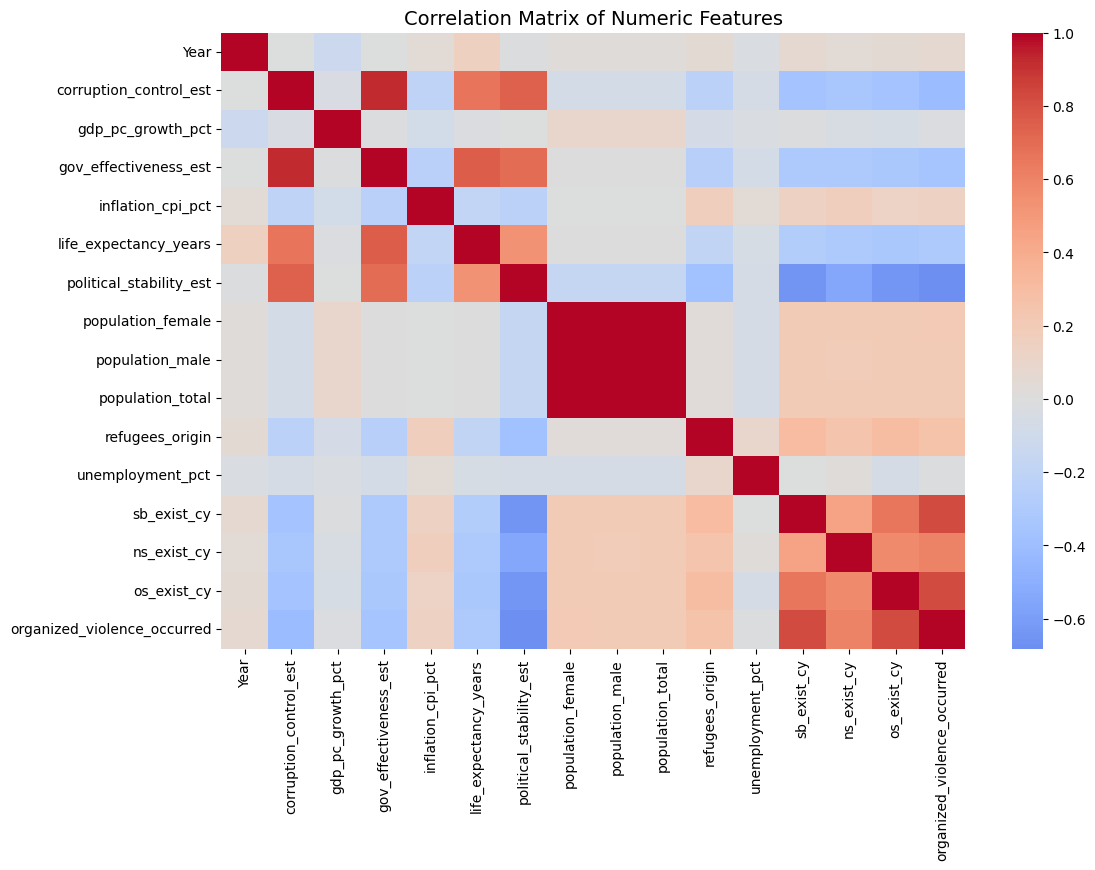

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df_merged[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()


### what is Scale / normalize continuous features?
I have performed it right now but i would like to know more about it
for our use case what i have got to know is that:
Features like inflation_cpi_pct (can be very large) and corruption_control_est (small values) are on different scales.

ML algorithms like Logistic Regression, SVM, or Neural Nets perform better with standardized features.

-> But I don't know how this works!

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = [
    'corruption_control_est', 'gdp_pc_growth_pct', 'gov_effectiveness_est',
    'inflation_cpi_pct', 'life_expectancy_years', 'political_stability_est',
    'population_total', 'refugees_origin', 'unemployment_pct'
]

scaler = StandardScaler()
df_merged[features_to_scale] = scaler.fit_transform(df_merged[features_to_scale])


In [ ]:
print(df_merged["organized_violence_occurred"].value_counts(normalize=True))

organized_violence_occurred
0    0.721004
1    0.278996
Name: proportion, dtype: float64


In [ ]:
df_merged.head()

,Country,Country Code,Year,corruption_control_est,gdp_pc_growth_pct,gov_effectiveness_est,inflation_cpi_pct,life_expectancy_years,political_stability_est,population_female,...,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred,gdp_pc_growth_pct_was_na,inflation_cpi_pct_was_na,unemployment_pct_was_na,refugees_origin_was_na,gov_effectiveness_est_was_na,corruption_control_est_was_na
0,Afghanistan,AFG,2004,-1.326321,-0.763888,-0.935662,-0.055801,-1.483677,-2.312806,11709120.0,...,1,1,1,1,False,True,False,False,False,False
1,Afghanistan,AFG,2005,-1.421599,0.967859,-1.217983,0.484804,-1.434469,-2.078754,12119909.0,...,1,0,1,1,False,False,False,False,False,False
2,Afghanistan,AFG,2006,-1.420652,-0.167834,-1.461656,0.062396,-1.400013,-2.234286,12618615.0,...,1,1,1,1,False,False,False,False,False,False
3,Afghanistan,AFG,2007,-1.585318,1.750726,-1.428274,0.198099,-1.354634,-2.433530,12853489.0,...,1,1,1,1,False,False,False,False,False,False
4,Afghanistan,AFG,2008,-1.643354,-0.068853,-1.515542,1.467690,-1.269957,-2.718681,13131734.0,...,1,0,1,1,False,False,False,False,False,False


In [ ]:
wb_pivot.head()

Series Name,Country,Country Code,Year,corruption_control_est,gdp_pc_growth_pct,gov_effectiveness_est,inflation_cpi_pct,life_expectancy_years,political_stability_est,population_female,population_male,population_total,refugees_origin,unemployment_pct
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,NaN,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [ ]:
df_ucdp.head()

,Country,Year,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
15,Afghanistan,2004,1,1,1,1
16,Afghanistan,2005,1,0,1,1
17,Afghanistan,2006,1,1,1,1
18,Afghanistan,2007,1,1,1,1
19,Afghanistan,2008,1,0,1,1


Overall counts (0 = no violence, 1 = violence):
 organized_violence_occurred
0    2269
1     878
Name: count, dtype: int64

Overall proportions:
 organized_violence_occurred
0    0.721004
1    0.278996
Name: proportion, dtype: float64

Year-wise summary (first 10 rows):
       sum  count  pos_rate
Year                      
2004   45    155  0.290323
2005   43    155  0.277419
2006   35    156  0.224359
2007   37    156  0.237179
2008   43    157  0.273885
2009   41    157  0.261146
2010   35    157  0.222930
2011   39    158  0.246835
2012   37    158  0.234177
2013   39    158  0.246835


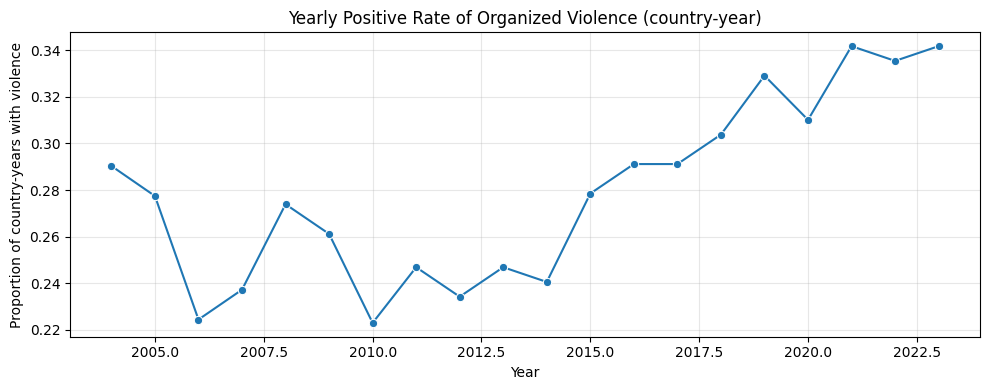


Top 15 countries by number of positive years (sum):
                           sum  count  pos_rate
Country                                       
Afghanistan                20     20       1.0
Algeria                    20     20       1.0
Bangladesh                 20     20       1.0
Azerbaijan                 20     20       1.0
Central African Republic   20     20       1.0
Brazil                     20     20       1.0
Nigeria                    20     20       1.0
India                      20     20       1.0
Israel                     20     20       1.0
Kenya                      20     20       1.0
Mexico                     20     20       1.0
Iraq                       20     20       1.0
Ethiopia                   20     20       1.0
Colombia                   20     20       1.0
Sudan                      20     20       1.0


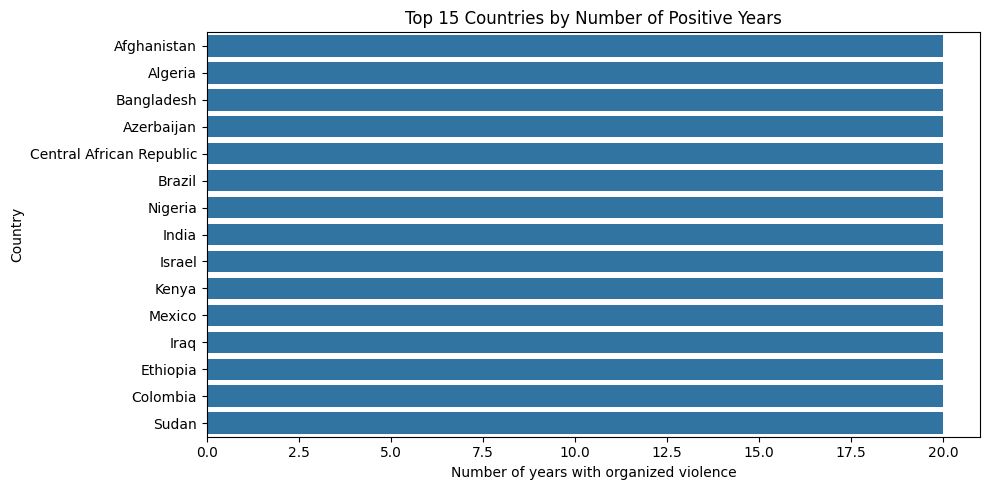


Cross-tab of organized_violence_occurred vs (sb, ns, os) presence (counts):
 sb_exist_cy                     0                 1              
ns_exist_cy                     0        1        0        1     
os_exist_cy                     0    1   0   1    0    1   0    1
organized_violence_occurred                                      
0                            2269    0   0   0    0    0   0    0
1                               0  107  52  72  158  224  16  249


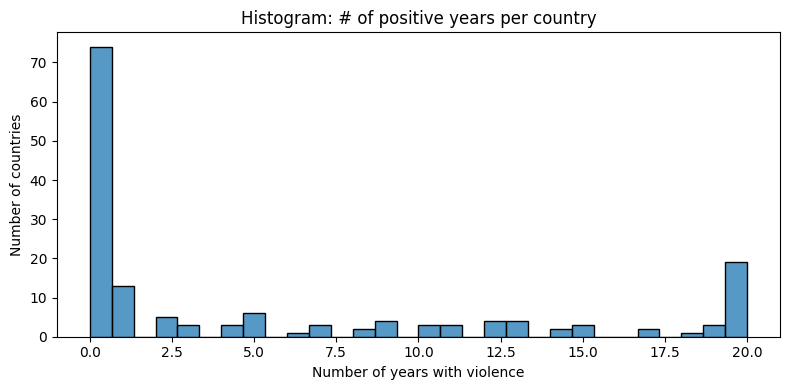


Saved: eda_year_table.csv and eda_country_counts.csv


In [ ]:
# === CLASS BALANCE CHECK (Run this) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_merged.copy()   # use your merged dataframe variable here if named differently

# --- Basic checks / safety ---
required_cols = ["Country", "Year", "organized_violence_occurred", "sb_exist_cy", "ns_exist_cy", "os_exist_cy"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns in df: {missing}. Adjust column names and re-run.")

# Ensure types
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype(int)
df["organized_violence_occurred"] = pd.to_numeric(df["organized_violence_occurred"], errors="coerce").fillna(0).astype(int)
for c in ["sb_exist_cy","ns_exist_cy","os_exist_cy"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)

# 1) Overall class distribution
counts = df["organized_violence_occurred"].value_counts().sort_index()
prop = df["organized_violence_occurred"].value_counts(normalize=True).sort_index()
print("Overall counts (0 = no violence, 1 = violence):\n", counts)
print("\nOverall proportions:\n", prop)

# 2) Year-wise positive rate
year_table = df.groupby("Year")["organized_violence_occurred"].agg(["sum","count"])
year_table["pos_rate"] = year_table["sum"] / year_table["count"]
print("\nYear-wise summary (first 10 rows):\n", year_table.head(10))

# Plot 1: Yearly positive rate
plt.figure(figsize=(10,4))
sns.lineplot(data=year_table, x=year_table.index, y="pos_rate", marker="o")
plt.title("Yearly Positive Rate of Organized Violence (country-year)")
plt.ylabel("Proportion of country-years with violence")
plt.xlabel("Year")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3) Country-wise positive counts and rates
country_counts = df.groupby("Country")["organized_violence_occurred"].agg(["sum","count"])
country_counts["pos_rate"] = country_counts["sum"] / country_counts["count"]
country_counts_sorted = country_counts.sort_values("sum", ascending=False)

print("\nTop 15 countries by number of positive years (sum):\n", country_counts_sorted.head(15))

# Plot 2: Top countries by positive years
topN = 15
plt.figure(figsize=(10,5))
sns.barplot(y=country_counts_sorted.head(topN).index, x=country_counts_sorted.head(topN)["sum"])
plt.title(f"Top {topN} Countries by Number of Positive Years")
plt.xlabel("Number of years with organized violence")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 4) Overlap between types (Venn-style numeric table)
types_cross = pd.crosstab(index=df["organized_violence_occurred"],
                          columns=[df["sb_exist_cy"], df["ns_exist_cy"], df["os_exist_cy"]])
print("\nCross-tab of organized_violence_occurred vs (sb, ns, os) presence (counts):\n", types_cross.head())

# 5) Distribution of positives per country (histogram)
plt.figure(figsize=(8,4))
sns.histplot(country_counts["sum"], bins=30, kde=False)
plt.title("Histogram: # of positive years per country")
plt.xlabel("Number of years with violence")
plt.ylabel("Number of countries")
plt.tight_layout()
plt.show()

# Save summaries to csv (optional)
year_table.reset_index().to_csv("eda_year_table.csv", index=False)
country_counts_sorted.reset_index().to_csv("eda_country_counts.csv", index=False)

print("\nSaved: eda_year_table.csv and eda_country_counts.csv")


## Stratified split
so that both train/test have 28% positives

In [ ]:
X = df_merged.drop(columns=[
    "Country", "Country Code", "Year",  # drop non-numeric identifiers
    "organized_violence_occurred",
    "population_female", "population_male",  # drop redundant
    "sb_exist_cy","ns_exist_cy","os_exist_cy"  # drop subcomponents since we’re predicting the aggregate
])
y = df_merged["organized_violence_occurred"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, " Positives:", y_train.mean())
print("Test shape:", X_test.shape, " Positives:", y_test.mean())

Train shape: (2517, 15)  Positives: 0.2789034564958284
Test shape: (630, 15)  Positives: 0.27936507936507937


## Training The model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Decision Tree (baseline)
dt = DecisionTreeClassifier(
    max_depth=5, random_state=42
)

# 2. Random Forest
rf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42, n_jobs=-1
)

# 3. Gradient Boosting (fast scikit-learn version)
gb = HistGradientBoostingClassifier(
    max_depth=6, learning_rate=0.1, max_iter=200, random_state=42
)

models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\n{name} Results")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC:", auc)

    results[name] = {
        "ConfusionMatrix": confusion_matrix(y_test, y_pred),
        "Report": classification_report(y_test, y_pred, digits=3, output_dict=True),
        "ROC-AUC": auc
    }



Decision Tree Results
[[420  34]
 [ 38 138]]
              precision    recall  f1-score   support

           0      0.917     0.925     0.921       454
           1      0.802     0.784     0.793       176

    accuracy                          0.886       630
   macro avg      0.860     0.855     0.857       630
weighted avg      0.885     0.886     0.885       630

ROC-AUC: 0.9432443932719263

Random Forest Results
[[430  24]
 [ 35 141]]
              precision    recall  f1-score   support

           0      0.925     0.947     0.936       454
           1      0.855     0.801     0.827       176

    accuracy                          0.906       630
   macro avg      0.890     0.874     0.881       630
weighted avg      0.905     0.906     0.905       630

ROC-AUC: 0.9603649379255107

Gradient Boosting Results
[[434  20]
 [ 39 137]]
              precision    recall  f1-score   support

           0      0.918     0.956     0.936       454
           1      0.873     0.778     0

### model comparison

In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    name: {
        "Accuracy": results[name]["Report"]["accuracy"],
        "Precision (Pos)": results[name]["Report"]["1"]["precision"],
        "Recall (Pos)": results[name]["Report"]["1"]["recall"],
        "F1 (Pos)": results[name]["Report"]["1"]["f1-score"],
        "ROC-AUC": results[name]["ROC-AUC"]
    }
    for name in results
}).T

print(comparison)

                   Accuracy  Precision (Pos)  Recall (Pos)  F1 (Pos)   ROC-AUC
Decision Tree      0.885714         0.802326      0.784091  0.793103  0.943244
Random Forest      0.906349         0.854545      0.801136  0.826979  0.960365
Gradient Boosting  0.906349         0.872611      0.778409  0.822823  0.959739
